In [3]:
import sys
sys.path.append("/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/svg2plan/_scripts")

from svg_reader import SVGReader
from adjacencies.adjacency import AdjacencyGenerator
from adjacencies.connectivity import ConnectivityGenerator

from svg_helpers.directions import Direction

from dataclasses import dataclass
from enum import Enum

import networkx as nx
from typing import Dict

from svg_helpers.domains import Corners

In [4]:
svg_name = "amber_building_a_f01.svg"
sv = SVGReader(svg_name)
sv.run()

In [5]:
ag = AdjacencyGenerator(sv.domains)
ag.run()

In [6]:
cg = ConnectivityGenerator(ag.positioned_graph)
cg.run()

Corners(x_left=269.0, x_right=830.0, y_bottom=187.0, y_top=509.0)
549.5 348.0


In [7]:
rooms = {k:ix for ix, k in enumerate(list(cg.G_init.nodes))}
Rooms = Enum("Rooms", rooms)


In [8]:
Rooms._member_names_

['bedroom_1',
 'kitchen',
 'm_bath',
 'm_bedroom',
 'm_closet',
 'bath',
 'dining',
 'transit_space',
 'closet',
 'bedroom_2',
 'laundry']

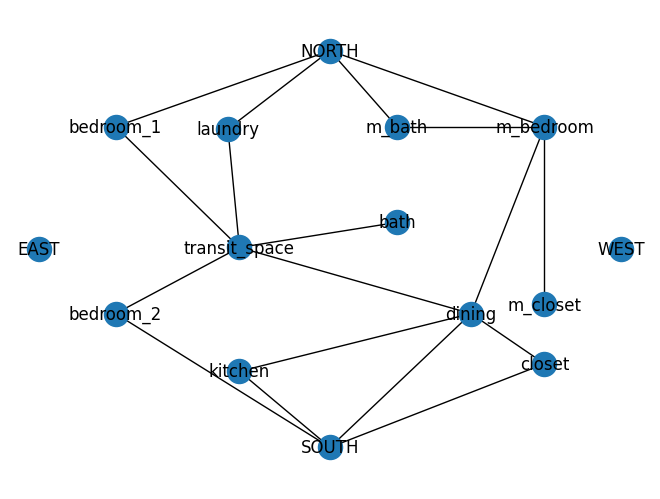

In [9]:
cg.draw_graph()

In [9]:
# windows
id3 = [('m_bath', Direction.NORTH.name),  
       ('m_bedroom', Direction.NORTH.name),]
id11 = [('kitchen', Direction.SOUTH.name),  ]

cg.update_id(id3, 3)
cg.update_id(id11, 11)

# doors
id8 = [('m_bath', "m_bedroom"),  
       ('bath', "transit_space"),]
id100 = [("kitchen", "dining")]

cg.update_id(id8, 8)
cg.update_id(id100, 100)

In [10]:
data = nx.node_link_data(cg.G)
data["links"]

[{'data': Subsurface(door_or_window=<SubsurfaceObjectType.DOOR: 0>, id=7),
  'source': 'bedroom_1',
  'target': 'transit_space'},
 {'data': Subsurface(door_or_window=<SubsurfaceObjectType.WINDOW: 1>, id=1),
  'source': 'bedroom_1',
  'target': 'NORTH'},
 {'data': Subsurface(door_or_window=<SubsurfaceObjectType.DOOR: 0>, id=7),
  'source': 'kitchen',
  'target': 'dining'},
 {'data': Subsurface(door_or_window=<SubsurfaceObjectType.WINDOW: 1>, id=1),
  'source': 'kitchen',
  'target': 'SOUTH'},
 {'data': Subsurface(door_or_window=<SubsurfaceObjectType.DOOR: 0>, id=7),
  'source': 'm_bath',
  'target': 'm_bedroom'},
 {'data': Subsurface(door_or_window=<SubsurfaceObjectType.WINDOW: 1>, id=1),
  'source': 'm_bath',
  'target': 'NORTH'},
 {'data': Subsurface(door_or_window=<SubsurfaceObjectType.DOOR: 0>, id=7),
  'source': 'm_bedroom',
  'target': 'm_closet'},
 {'data': Subsurface(door_or_window=<SubsurfaceObjectType.DOOR: 0>, id=7),
  'source': 'm_bedroom',
  'target': 'dining'},
 {'data': S

In [11]:
for e in cg.G.edges(data=True):
    print(e[-1])

{'data': Subsurface(door_or_window=<SubsurfaceObjectType.DOOR: 0>, id=7)}
{'data': Subsurface(door_or_window=<SubsurfaceObjectType.WINDOW: 1>, id=1)}
{'data': Subsurface(door_or_window=<SubsurfaceObjectType.DOOR: 0>, id=100)}
{'data': Subsurface(door_or_window=<SubsurfaceObjectType.WINDOW: 1>, id=11)}
{'data': Subsurface(door_or_window=<SubsurfaceObjectType.DOOR: 0>, id=8)}
{'data': Subsurface(door_or_window=<SubsurfaceObjectType.WINDOW: 1>, id=3)}
{'data': Subsurface(door_or_window=<SubsurfaceObjectType.DOOR: 0>, id=7)}
{'data': Subsurface(door_or_window=<SubsurfaceObjectType.DOOR: 0>, id=7)}
{'data': Subsurface(door_or_window=<SubsurfaceObjectType.WINDOW: 1>, id=3)}
{'data': Subsurface(door_or_window=<SubsurfaceObjectType.DOOR: 0>, id=8)}
{'data': Subsurface(door_or_window=<SubsurfaceObjectType.DOOR: 0>, id=7)}
{'data': Subsurface(door_or_window=<SubsurfaceObjectType.DOOR: 0>, id=7)}
{'data': Subsurface(door_or_window=<SubsurfaceObjectType.WINDOW: 1>, id=1)}
{'data': Subsurface(door_